<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/REGRESION/multivariate_regression_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns 
mpg = sns.load_dataset("mpg")
mpg_num = mpg.select_dtypes(include='number') # keep only numeric variables 
mpg_num_nonans = mpg_num.dropna() # remove observations with NaNs

print('datos originales = {}'.format(mpg.shape))
print('datos numericos = {}'.format(mpg_num.shape))
print('datos numericos sin NaNs = {}'.format(mpg_num_nonans.shape))

datos originales = (398, 9)
datos numericos = (398, 7)
datos numericos sin NaNs = (392, 7)


In [2]:
mpg_num_nonans.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [4]:
import statsmodels.api as sm # import statsmodels 

X = mpg_num_nonans[['weight','cylinders','model_year']] ## X uis the input variables (or independent variables)
y = mpg_num_nonans["mpg"] ## Y is the output/dependent variable
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit() 
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     545.6
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          8.73e-139
Time:                        18:42:11   Log-Likelihood:                -1037.3
No. Observations:                 392   AIC:                             2083.
Df Residuals:                     388   BIC:                             2099.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9076      4.066     -3.420      0.001     -21.902      -5.913
weight        -0.0064      0.000    -13.746      0.000      -0.007      -0.005
cylinders     -0.1517      0.234     -0.649      0.517      -0.611       0.308
model_year     0.7520      0.050     14.987      0.000       0.653       0.851
==============================================================================
Omnibus:                       43.326   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.042
Skew:                           0.678   Prob(JB):                     8.35e-17
Kurtosis:                       4.642   Cond. No.                     7.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
model.params

const        -13.907606
weight        -0.006366
cylinders     -0.151729
model_year     0.752020
dtype: float64

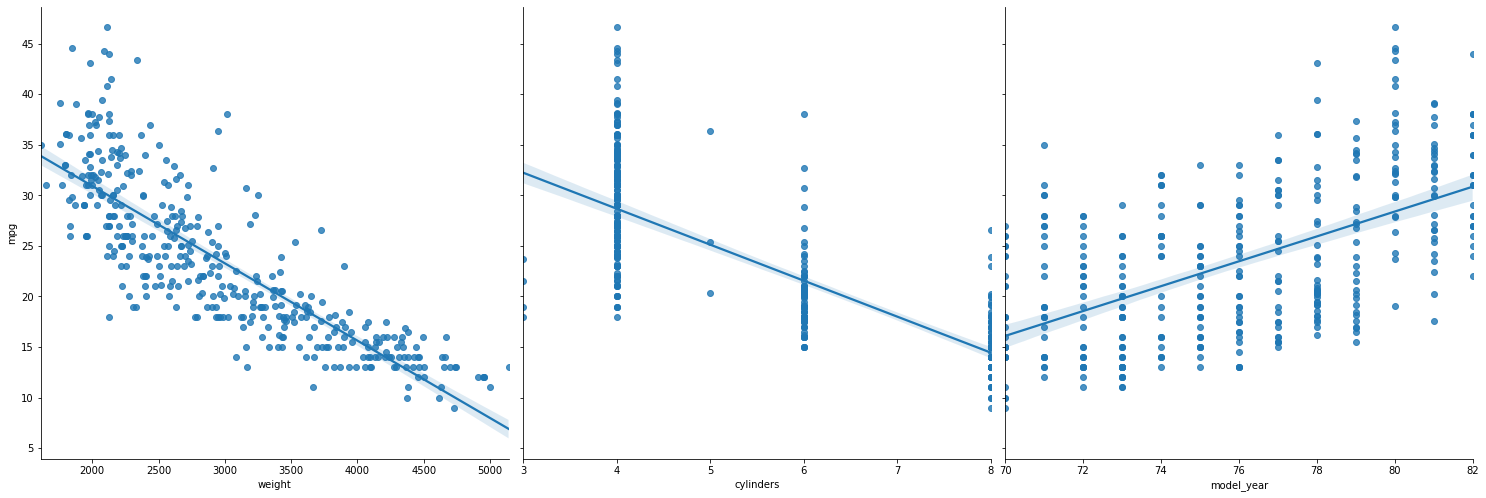

In [6]:
import matplotlib.pyplot as plt
sns.pairplot(mpg_num_nonans, kind="reg",x_vars=['weight','cylinders','model_year'],y_vars=["mpg"],height=7)
plt.show()